In [2]:
urls = {'Spanish' : "https://www.gutenberg.org/cache/epub/30275/pg30275.txt",
'German' : "https://www.gutenberg.org/cache/epub/7205/pg7205.txt",
'French' : "https://www.gutenberg.org/cache/epub/5258/pg5258.txt",
'English' : "https://www.gutenberg.org/files/65566/65566-0.txt"}


In [10]:
import nltk   
import urllib.request
import unicodedata
from unidecode import unidecode

def txtinurl(url):
    return urllib.request.urlopen(url).read().decode("utf-8")
def normalize(string):
            # el if else de la primera linea normaliza à,ã,ß,œ... pero mantiene la ñ
    return ''.join(unidecode(ch.lower()) if ch.lower() != 'ñ' else ch.lower()
                   # caracteres alfabeticos: quito espacios, puntos... y dejo ß, œ, ñ, á...
                   for ch in string if ch.isalpha())

def analisis_frec(T):
    frecuencias = {}
    N = len(T)
    print(str(N) + " characters after cleaning")
    for letra in T:
        if letra in frecuencias:
            frecuencias[letra] += (1/N).n()
        else:
            frecuencias[letra]=(1/N).n()
    l = sorted(frecuencias.items(), key=lambda item: item[1], reverse = True)
    return dict(l)

In [11]:
freqs = {}
for language in urls:
    print(language + ": text with ",end="")
    freqs[language] = analisis_frec(normalize(txtinurl(urls[language])))

Spanish: text with 202013 characters after cleaning
German: text with 426239 characters after cleaning
French: text with 479488 characters after cleaning
English: text with 161827 characters after cleaning


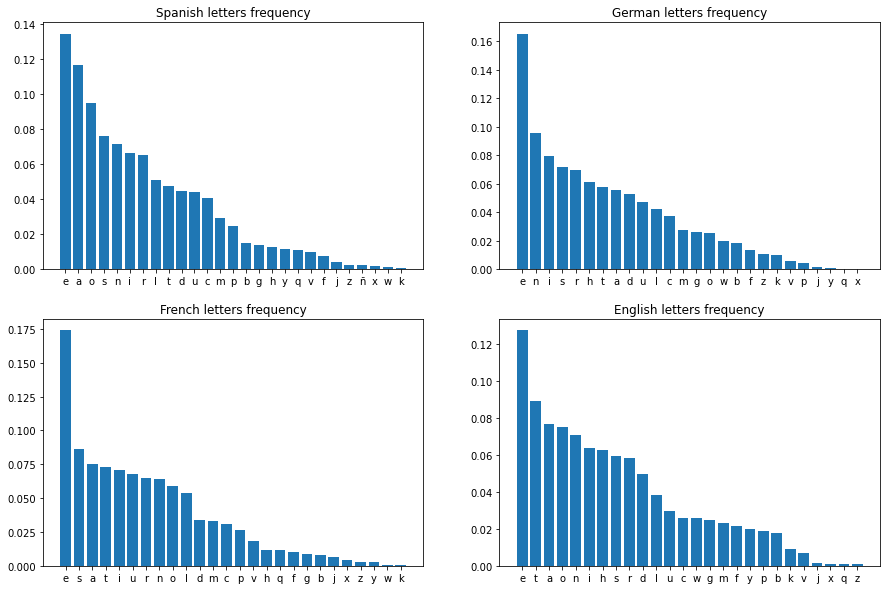

In [27]:
import matplotlib.pyplot as plt

i = 1
fig = plt.figure(figsize=(15,10))
for language in freqs:
    plt.subplot(2, 2, i)
    ax = fig.gca()
    ax.bar(freqs[language].keys(), freqs[language].values())
    ax.set_title(language + " letters frequency")
    i += 1
    